In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

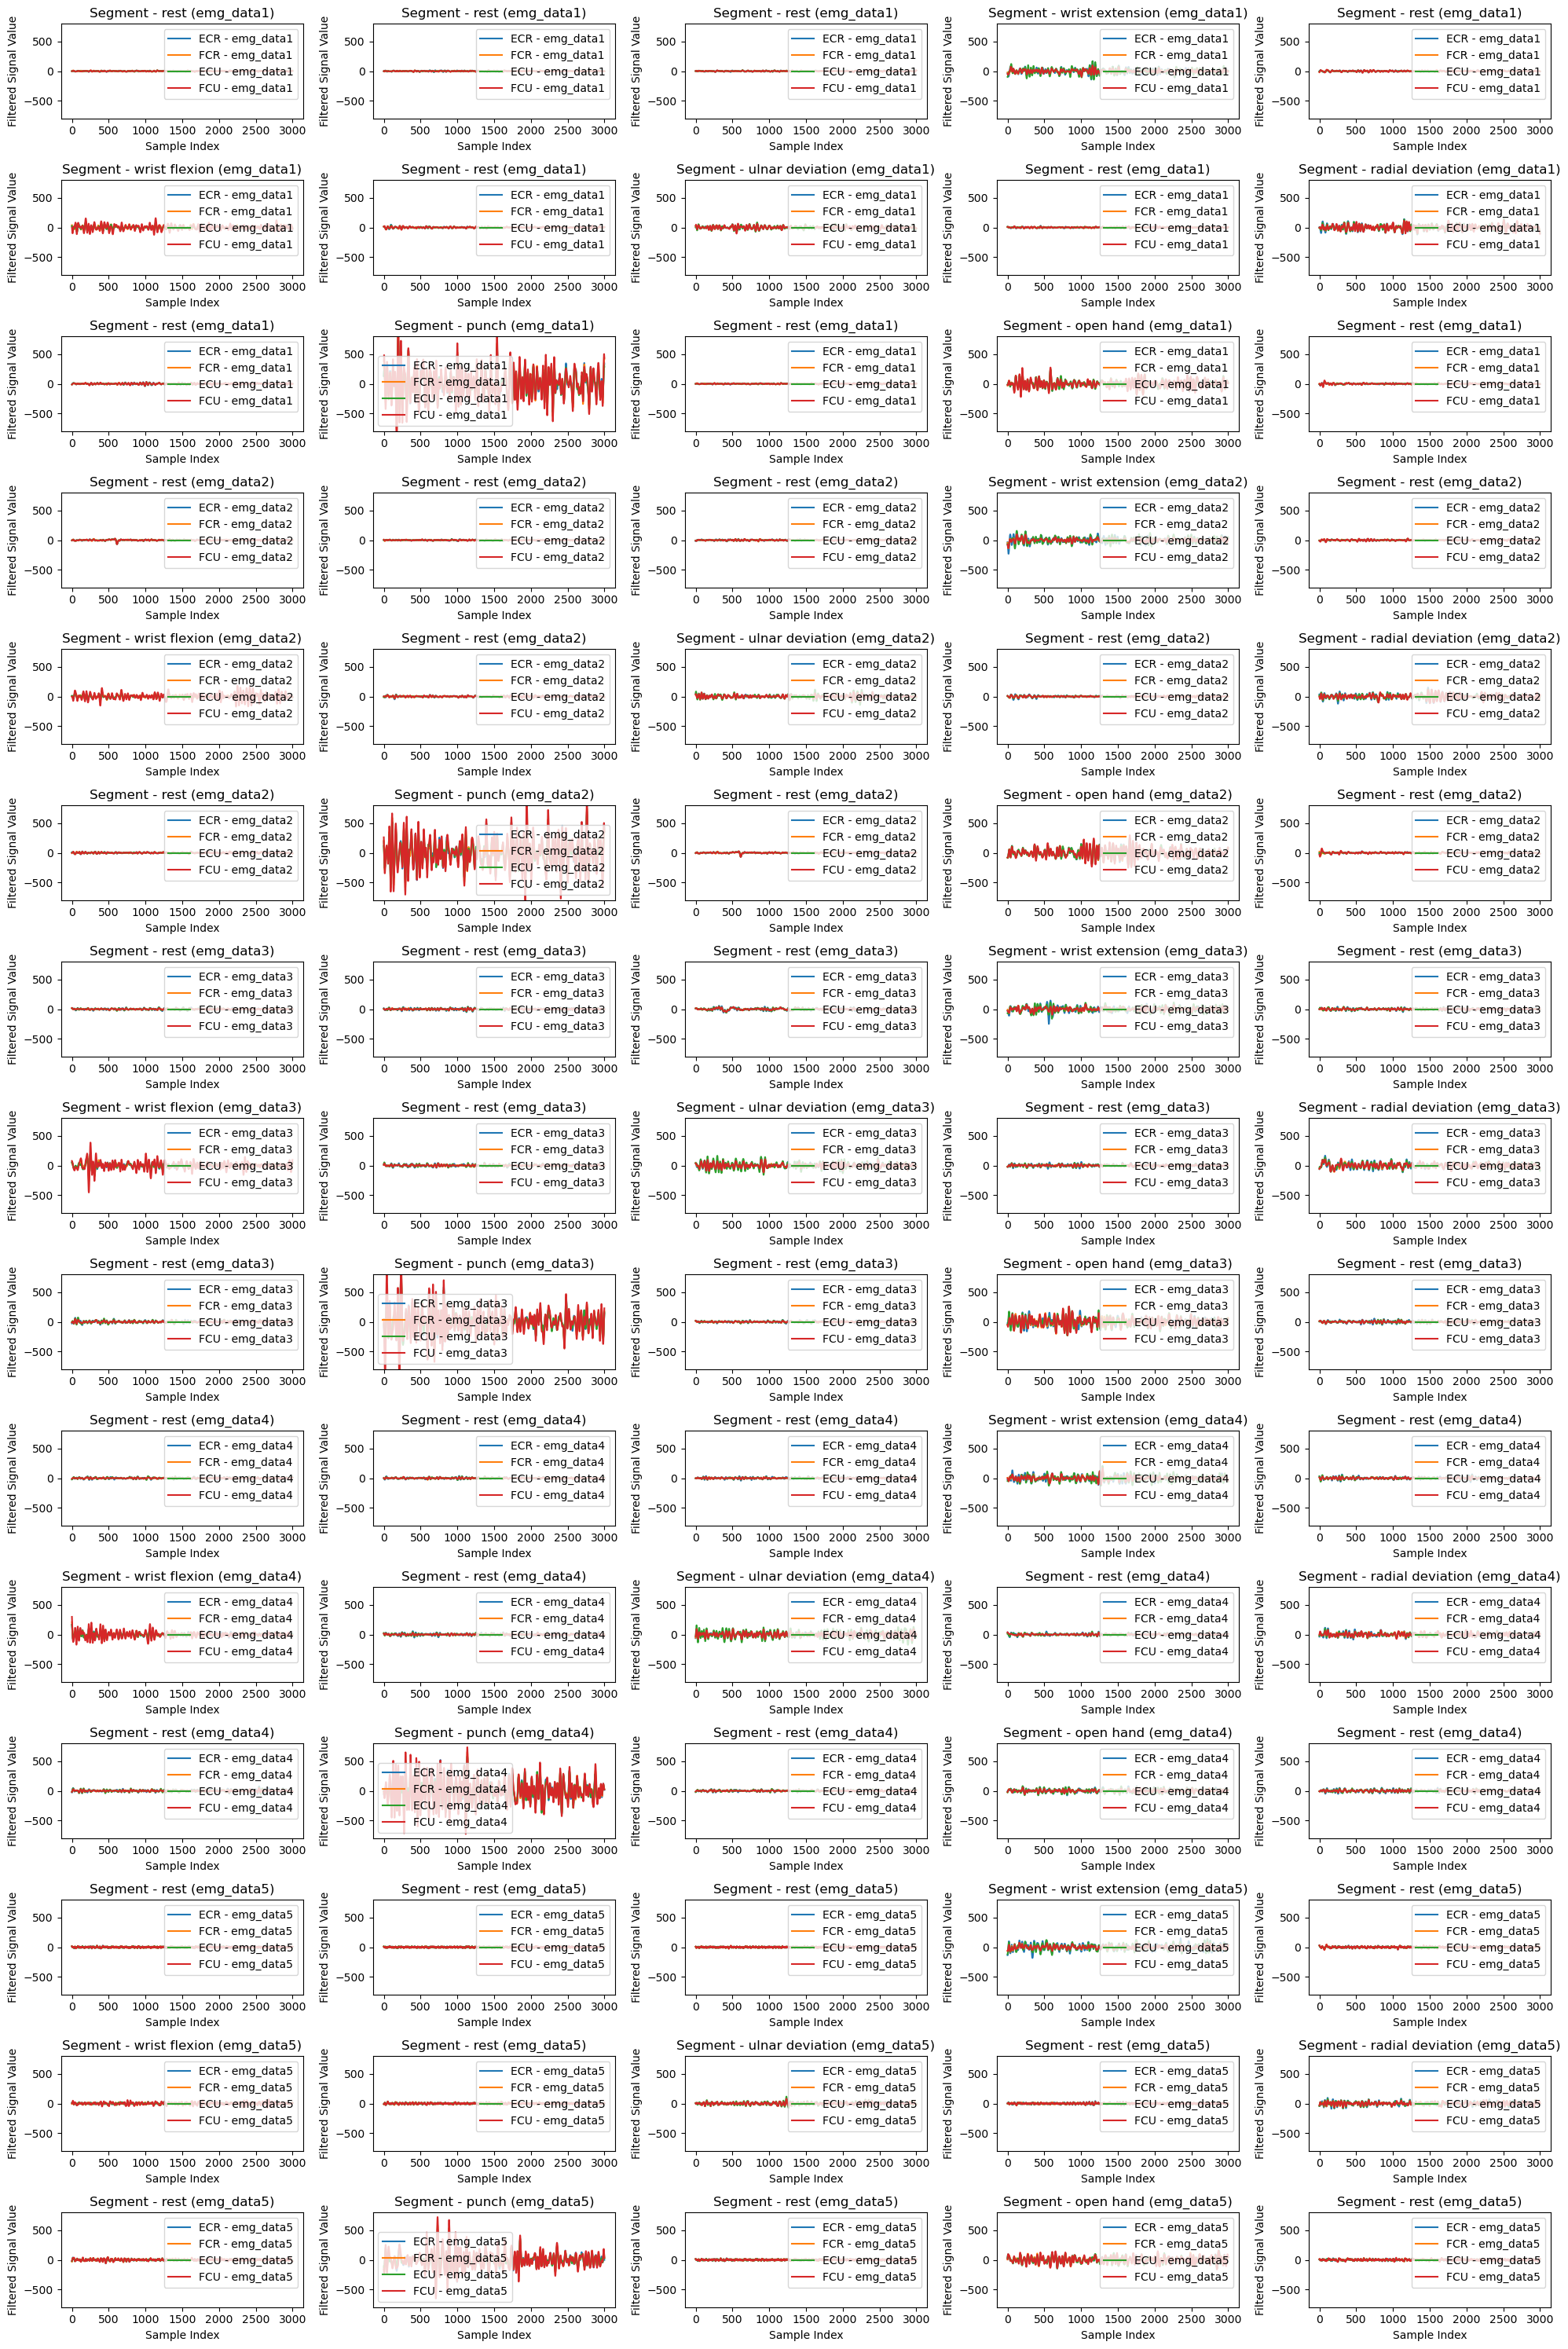

In [2]:
# Define the path to the merged directory
merged_dir = '/Users/ekinyilmaz/Desktop/mentalab/merged_segments'

# Load the combined labels CSV file
combined_labels_csv_path = os.path.join(merged_dir, 'combined_segment_labels.csv')
combined_labels_df = pd.read_csv(combined_labels_csv_path)

# Function to plot segments with labels in a grid
def plot_segments_with_labels_grid(merged_dir, combined_labels_df):
    # Define channels to plot
    channels_to_plot = ['ECR', 'FCR', 'ECU', 'FCU']

    # Set the number of rows and columns in the grid
    num_rows = 15
    num_columns = 5

    # Set y-axis limits
    y_limits = (-800, 800)  # Adjust as needed based on your data

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 30))

    # Iterate over segments in the combined labels DataFrame
    for index, row in combined_labels_df.iterrows():
        recording_name = row['Recording']
        segment_name = row['Segment']
        label = row['Label']

        # Load the segment CSV file
        segment_path = os.path.join(merged_dir, segment_name)
        segment_data = pd.read_csv(segment_path)

        # Plot each channel
        ax = axes[index // num_columns, index % num_columns]
        for channel in channels_to_plot:
            ax.plot(segment_data[channel], label=f'{channel} - {recording_name}')

        ax.set_title(f'Segment - {label} ({recording_name})')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('Filtered Signal Value')
        ax.legend()

        # Set y-axis limits for each subplot
        ax.set_ylim(y_limits)

    # Adjust layout to prevent clipping of subplot titles and labels
    plt.tight_layout()

    # Show the plots
    plt.show()

# Plot segments with labels in a grid
plot_segments_with_labels_grid(merged_dir, combined_labels_df)


File Name: segment_1_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_5.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_5.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3

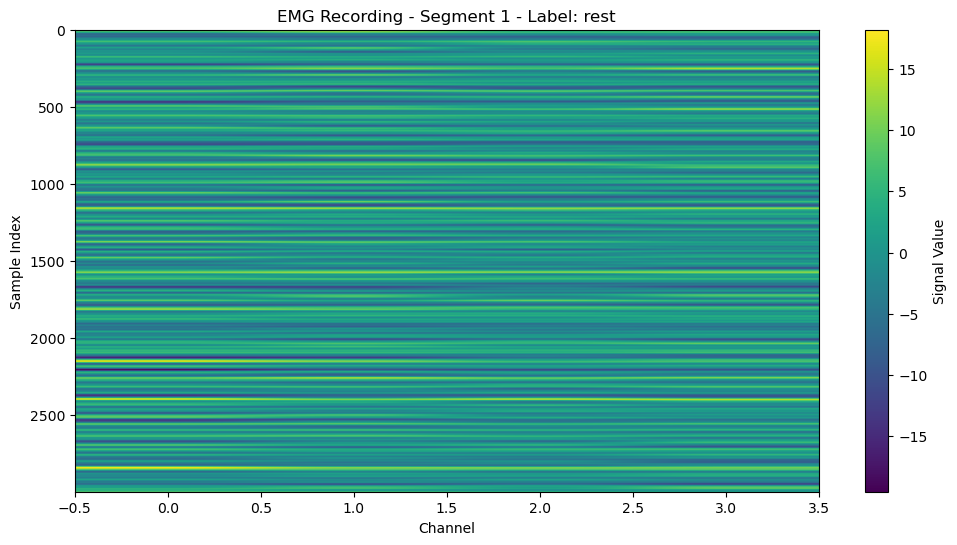

In [3]:
# Define the path to the merged directory
merged_dir = '/Users/ekinyilmaz/Desktop/mentalab/merged_segments'

# Load the combined labels CSV file
combined_labels_csv_path = os.path.join(merged_dir, 'combined_segment_labels.csv')
combined_labels_df = pd.read_csv(combined_labels_csv_path)

# Define channels to select
channels_to_select = ['ECR', 'FCR', 'ECU', 'FCU']

# Define the order of movement numbers
movement_order = [1, 2, 3, 5, 7, 9, 11, 13, 15, 4, 6, 8, 10, 12, 14]

# Create a list to store dictionaries for each segment
segment_data_list = []

# Create a list to store dictionaries with file names, labels, and EMG arrays
data_for_csv = []

# Iterate over the specified order of movement numbers
for movement_number in movement_order:
    # Iterate over segments in the combined labels DataFrame
    for index, row in combined_labels_df.iterrows():
        recording_name = row['Recording']
        segment_name = row['Segment']
        label = row['Label']

        # Extract movement number from the segment name
        _, current_movement, _ = segment_name.split('_')
        current_movement = int(current_movement)

        # Check if the current segment matches the current movement number
        if current_movement == movement_number:
            # Load the segment CSV file
            segment_path = os.path.join(merged_dir, segment_name)
            segment_data = pd.read_csv(segment_path)

            # Select the relevant columns (ECR, FCR, ECU, FCU)
            selected_data = segment_data[channels_to_select]

            # Convert the selected data to a 2D array and append to the list
            emg_array = selected_data.to_numpy()

            # Store data in a dictionary along with label and file name
            segment_data_dict = {
                'File Name': segment_name,
                'Label': label,
                'EMG_Array': emg_array
            }

            segment_data_list.append(segment_data_dict)

            # Append data dictionary for writing to CSV
            data_for_csv.append(segment_data_dict)

# Example: Display labels, file names, and sizes
for segment_data_dict in segment_data_list:
    file_name = segment_data_dict['File Name']
    label = segment_data_dict['Label']
    emg_array = segment_data_dict['EMG_Array']
    
    print(f"File Name: {file_name}")
    print(f"Label: {label}")
    print(f"Size of EMG Array: {emg_array.shape}")
    print("\n")

# Example: Plot the 2D array for the first segment
plt.figure(figsize=(12, 6))
plt.imshow(segment_data_list[0]['EMG_Array'], aspect='auto', cmap='viridis')
plt.title(f'EMG Recording - Segment 1 - Label: {segment_data_list[0]["Label"]}')
plt.xlabel('Channel')
plt.ylabel('Sample Index')
plt.colorbar(label='Signal Value')
plt.show()

# Write file names, labels, and EMG arrays to a CSV file
csv_output_path = os.path.join(merged_dir, 'file_names_labels_and_arrays.csv')
csv_df = pd.DataFrame(data_for_csv)
csv_df.to_csv(csv_output_path, index=False)



In [4]:
# Print the number of segments appended
print(f"Number of Segments Appended: {len(segment_data_list)}")

# Print the shape of each segment array
for segment_data_dict in segment_data_list:
    label = segment_data_dict['Label']
    emg_array = segment_data_dict['EMG_Array']
    print(f"Label: {label}, Shape of EMG Array: {emg_array.shape}")



Number of Segments Appended: 75
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of EMG Array: (3000, 4)
Label: rest, Shape of 

In [5]:
len(segment_data_list)

75

File Name: segment_1_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_1_5.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_2_5.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_1.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_2.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_3.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3_4.csv
Label: rest
Size of EMG Array: (3000, 4)


File Name: segment_3

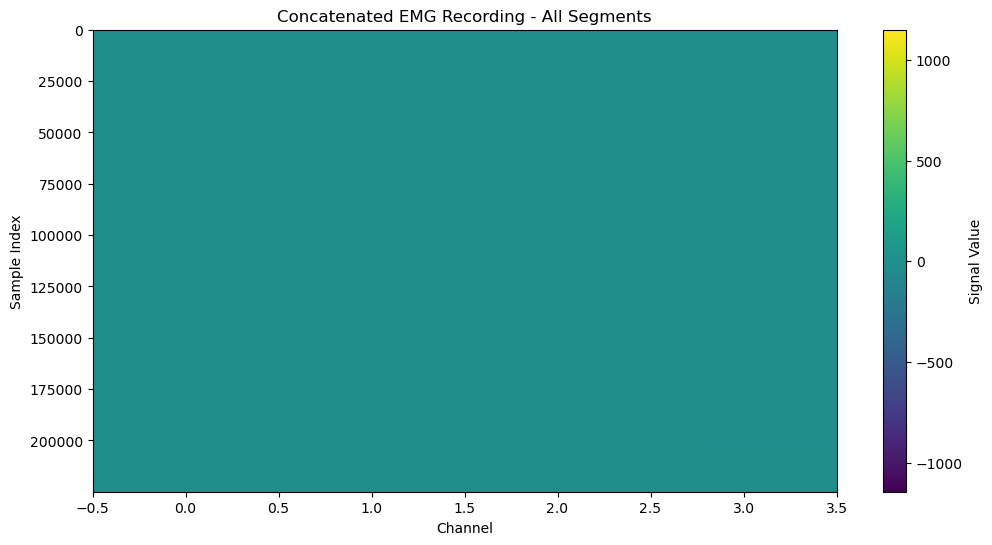

In [6]:
# Example: Display labels, file names, and sizes
for segment_data_dict in segment_data_list:
    file_name = segment_data_dict['File Name']
    label = segment_data_dict['Label']
    emg_array = segment_data_dict['EMG_Array']
    
    print(f"File Name: {file_name}")
    print(f"Label: {label}")
    print(f"Size of EMG Array: {emg_array.shape}")
    print("\n")

# Concatenate all EMG arrays along the sample index axis (axis=0)
concatenated_emg_array = np.vstack([segment_data_dict['EMG_Array'] for segment_data_dict in segment_data_list])

# Display the size of the concatenated EMG array
print(f"Size of Concatenated EMG Array: {concatenated_emg_array.shape}")

# Example: Plot the concatenated 2D array
plt.figure(figsize=(12, 6))
plt.imshow(concatenated_emg_array, aspect='auto', cmap='viridis')
plt.title(f'Concatenated EMG Recording - All Segments')
plt.xlabel('Channel')
plt.ylabel('Sample Index')
plt.colorbar(label='Signal Value')
plt.show()

# Write the concatenated EMG array to a CSV file
csv_output_path_concatenated = os.path.join(merged_dir, 'concatenated_arrays.csv')
pd.DataFrame(concatenated_emg_array).to_csv(csv_output_path_concatenated, index=False, header=False)

In [7]:
# For most systems or networks it is not possible to make sense out of one single timestamp but rather over an interval of samples called windows.
# We want to generate windows of 128 samples out of the recordings and have a time overlap of 50% of each window.

# Write a function that extracts windows of the described shape from the dataset (use at least one subject).

def extract_windows(signals, window_size, overlap):
    """
    To extract windows from given EMG signals
    
    Inputs:
    - signals: 2D array, EMG signals (samples x channels)
    - window_size: int, size of each window samplewise
    - overlap: float, overlap ratio (0 no overlap 1 total overlap may create problem with zero division?? )

    Returns:
    - windows: 3D array, windows (num_windows x window_size x num_channels)
    """

    num_samples, num_channels = signals.shape
    print(f"num_samples:", {num_samples})
    print(f"num_channels:", {num_channels})
    
    step_size = int(round(window_size * (1 - overlap + 1e-100)))
    print(f"steps_size:", {step_size})
    
    num_windows = int((num_samples - window_size) / step_size) + 1 #len(sequence) - window_size + 1 to stop on window size
    print(f"num_windows:", {num_windows})
    
    windows = np.zeros((num_windows,window_size,num_channels)) #(num_matrix,row,col)
    print(f"windows' shape (num_windows x window_size x num_channels):", {windows.shape})
    
    #for i in range(0, num_windows*step_size, step_size):
        #windows[:, :, i] = signals[i:i+window_size, :]

    for i in range(num_windows):
        start = i * step_size #start = i * (step_size-1)
        end = start + window_size
        # Start and end indices shown
        print(f"Window {i + 1}: start={start}, end={end}")
        windows[i, :, :] = signals[start:end,]

    return windows

# Select and implement 14 features. Compute each feature for each EMG channels individually.

# signals: 2D array, EMG signals (samples x channels)
# windows: 3D array, extracted windows (num_windows x window_size x num_channels)
# transposed : 3D array, extracted windows (num_windows x num_channels x window_size)

from scipy.stats import skew, kurtosis
from scipy import stats, signal

# Extract features for single channel.
def extract_features(channel_data):
    # mean absolute value
    mean_abs_value = np.mean(np.abs(channel_data))
    
    # root means square
    rms_value = np.sqrt(np.mean(np.square(channel_data)))
    
    # waveform length
    waveform_length = np.sum(np.diff(channel_data))
    
    # integral absolute value
    integral_abs_value = np.sum(np.abs(channel_data))
    
    # skewness
    skewness_value = skew(channel_data)
    
    # variance
    variance = np.var(channel_data)
    
    # zero crossing
    
    # kurtosis
    kurtosis_value = kurtosis(channel_data)
    
    # energy
    energy = np.sum(channel_data ** 2)
    
    #  Difference Absolute Standard Deviation Value
    dasdv = np.sqrt(np.mean(np.square(np.diff(channel_data))))
    
    # log-detector
    #log_det = np.exp(np.mean(np.log(np.abs(channel_data))))
    
    # simple square integral
    ssi = np.sum(np.square(channel_data))

    freq, power = signal.periodogram(channel_data, 5120) #5120 is the number of points to use in the FFT.
    
    # mean power
    mean_power = np.mean(power, axis=0)
    
    # mean frequency
    mean_freq = np.sum(power*freq, axis=0) / np.sum(power, axis=0)
    
    #peak frequency
    peak_freq = freq[np.argmax(power, axis=0)]
    
    # power spectrum deformation
    def sm(order):
        return np.sum(power * np.power(freq, order), axis=0)
    ohm = np.sqrt(sm(2)/sm(0)) / (sm(1)/sm(0))
    
    return mean_abs_value, rms_value, integral_abs_value, variance, energy, dasdv, ssi, mean_power, kurtosis_value, skewness_value, mean_freq, peak_freq, waveform_length, ohm

In [8]:
emg_merged = concatenated_emg_array
windows = extract_windows(emg_merged, window_size = 100, overlap = 0.5) 
print(windows)

num_samples: {225000}
num_channels: {4}
steps_size: {50}
num_windows: {4499}
windows' shape (num_windows x window_size x num_channels): {(4499, 100, 4)}
Window 1: start=0, end=100
Window 2: start=50, end=150
Window 3: start=100, end=200
Window 4: start=150, end=250
Window 5: start=200, end=300
Window 6: start=250, end=350
Window 7: start=300, end=400
Window 8: start=350, end=450
Window 9: start=400, end=500
Window 10: start=450, end=550
Window 11: start=500, end=600
Window 12: start=550, end=650
Window 13: start=600, end=700
Window 14: start=650, end=750
Window 15: start=700, end=800
Window 16: start=750, end=850
Window 17: start=800, end=900
Window 18: start=850, end=950
Window 19: start=900, end=1000
Window 20: start=950, end=1050
Window 21: start=1000, end=1100
Window 22: start=1050, end=1150
Window 23: start=1100, end=1200
Window 24: start=1150, end=1250
Window 25: start=1200, end=1300
Window 26: start=1250, end=1350
Window 27: start=1300, end=1400
Window 28: start=1350, end=1450
W

In [9]:
# Extract features from EMG data, windows' shape (num_windows x window_size x num_channels): (1151, 128, 256)
num_windows = windows.shape[0]
num_channels = windows.shape[2]
num_features = 14 # manual entry, might need to update it

feature_matrix = np.zeros((num_windows, num_channels, num_features))
print(feature_matrix.shape)

transposed_windows = windows.transpose(0,2,1)
print(transposed_windows.shape)

(4499, 4, 14)
(4499, 4, 100)


In [10]:
# Iterate through each channel in each window, it takes some time to calculate longer than 2 mins
for window_index in range(num_windows):
    for channel_index in range(num_channels):
        channel_data = transposed_windows[window_index,channel_index,:]
        channel_features = extract_features(channel_data)
        feature_matrix[window_index, channel_index,:] = channel_features
        
print(feature_matrix.shape)  #feature matrix shape = num_windows (1151) x num_channels (256) x num_features(14)

(4499, 4, 14)


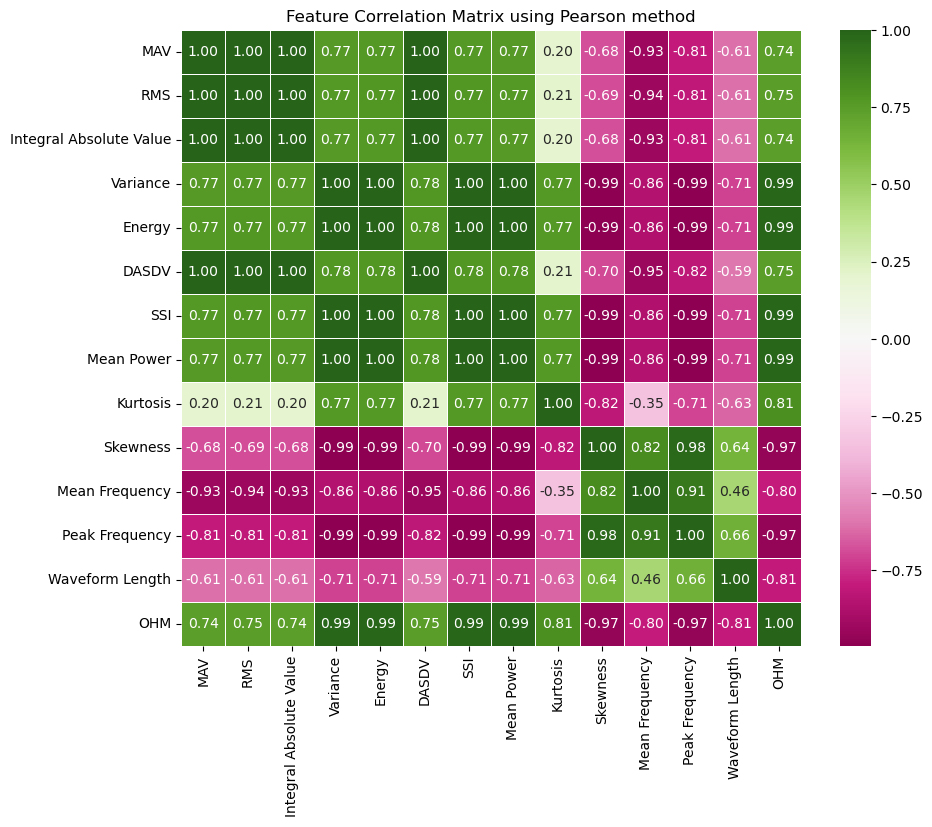

In [11]:
# Compute the feature correlation matrix with the python library pandas. Plot the correlation matrix and briefly mention which features you would use.

feature_names = ["MAV", "RMS", "Integral Absolute Value", "Variance", "Energy", "DASDV", "SSI", "Mean Power","Kurtosis","Skewness","Mean Frequency","Peak Frequency", "Waveform Length", "OHM"]

df = pd.DataFrame(np.mean(feature_matrix, axis=0), columns = feature_names) 

# Compute the correlation matrix, default pearson method is used here
correlation_matrix = df.corr() 

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".2f", linewidths=.5)
plt.title("Feature Correlation Matrix using Pearson method")
plt.show()

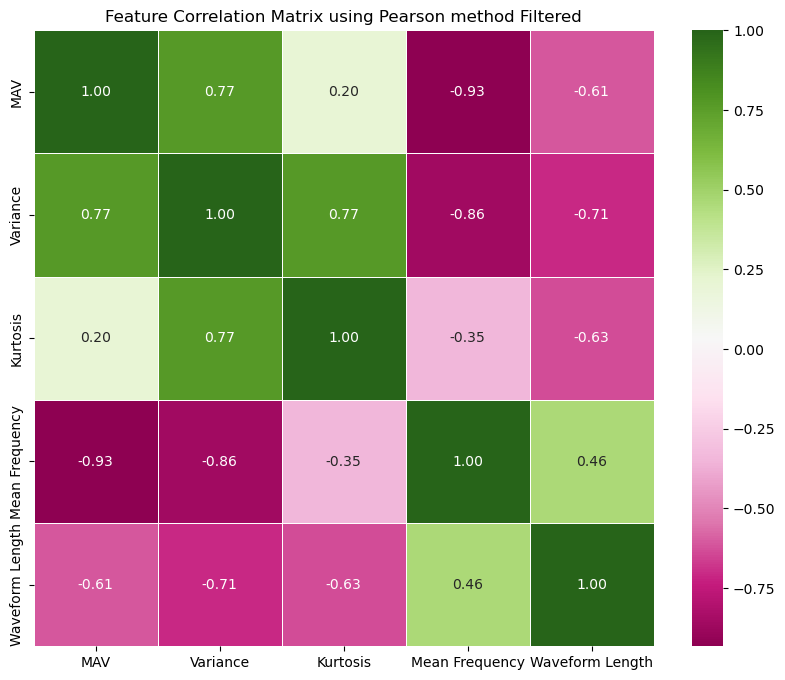

{'RMS', 'Peak Frequency', 'OHM', 'Mean Power', 'Skewness', 'Integral Absolute Value', 'Energy', 'DASDV', 'SSI'}


In [12]:
# Remove highly correlated features, keep at least 5 features, if not increase the threshold slightly.
threshold = 0.95 # provided in the assignment
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features from the DataFrame
df_filtered = df.drop(columns=highly_correlated_features)

# Display the DataFrame after removing highly correlated features
#print("\nDataFrame after removing highly correlated features:")
#print(df_filtered)

# Compute the correlation matrix, default pearson method is used here
correlation_matrix_filtered = df_filtered.corr() 

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="PiYG", fmt=".2f", linewidths=.5)
plt.title("Feature Correlation Matrix using Pearson method Filtered")
plt.show()

print(highly_correlated_features)

In [13]:
feature_names = ["MAV", "RMS", "Integral Absolute Value", "Variance", "Energy", "DASDV", "SSI", "Mean Power", "Kurtosis", "Skewness", "Mean Frequency", "Peak Frequency", "Waveform Length", "OHM"]

# Features to delete
features_to_delete = ['Mean Power', 'Peak Frequency', 'Energy', 'SSI', 'RMS', 'Integral Absolute Value']

# Remove specified features
for feature in features_to_delete:
    if feature in feature_names:
        feature_names.remove(feature)

print("Updated feature_names:", feature_names)


Updated feature_names: ['MAV', 'Variance', 'DASDV', 'Kurtosis', 'Skewness', 'Mean Frequency', 'Waveform Length', 'OHM']


In [14]:
array_3d = feature_matrix

array_2d = array_3d.reshape(-1, array_3d.shape[-1])

columns = ["MAV", "RMS", "Integral Absolute Value", "Variance", "Energy", "DASDV", "SSI", "Mean Power","Kurtosis","Skewness","Mean Frequency","Peak Frequency", "Waveform Length", "OHM"]

df_ekin = pd.DataFrame(array_2d, columns=columns)

columns_to_drop = highly_correlated_features

df_dropped = df_ekin.drop(columns=columns_to_drop)

# Convert DataFrame back to NumPy array
array_after_drop = df_dropped.values.reshape(array_3d.shape[0], array_3d.shape[1], -1)

#print("Original 3D Array:")
#print(array_3d)

#print("\nDataFrame from 3D Array:")
#print(df_ekin)

#print("\nDataFrame after dropping columns:")
#print(df_dropped)

#print("\nNumPy array after dropping columns:")
#print(array_after_drop)

print("\nShape of feature matrix after dropping columns:")
print(array_after_drop.shape)


Shape of feature matrix after dropping columns:
(4499, 4, 5)


In [15]:
# Define the length of the 1D array
length = 4499

# Create a 1D array initialized with zeros
my_1d_array = np.zeros(length, dtype=int)

# Set the elements as specified
my_1d_array[:45 * 60] = 0
my_1d_array[45 * 60:50 * 60] = 1
my_1d_array[50 * 60:55 * 60] = 2
my_1d_array[55 * 60:60 * 60] = 3
my_1d_array[60 * 60:65 * 60] = 4
my_1d_array[65 * 60:70 * 60] = 5
my_1d_array[70 * 60:-1] = 6

# Print the resulting array
print(my_1d_array.shape)

labels = my_1d_array

(4499,)


In [16]:
print(emg_merged.shape)
# Print the resulting array
print(labels)
print(labels.shape)

(225000, 4)
[0 0 0 ... 6 6 0]
(4499,)


In [17]:
# Assuming X contains 7 features and y contains 7 labels.
X_3d = array_after_drop
y = labels
X = X_3d.reshape((X_3d.shape[0], -1))
print(X_3d.shape)
print(X.shape)
print(y.shape)


(4499, 4, 5)
(4499, 20)
(4499,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(1350, 20)
(1350,)
(3149, 20)
(3149,)


In [21]:
from sklearn import svm

# X features, y labels

svm_classifier = svm.SVC(kernel='linear', decision_function_shape='ovr')  # OvR strategy

svm_classifier.fit(X_train, y_train)

predictions_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8607407407407407


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(X_train, y_train)

predictions_lda = lda_classifier.predict(X_test)

accuracy_lda = accuracy_score(y_test, predictions_lda)
print("Accuracy:", accuracy_lda)

Accuracy: 0.8192592592592592


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Random Forest Classifier Accuracy: 0.857037037037037
